In [1]:
# K-EN YAKIN KOMŞU (KNN) TAHMİNLER GÖZLEM BENZERLİĞİNE GÖRE YAPILIR
# BANA ARAKADAŞINI SÖYLE KİM OLDUĞUNU SÖYLEYİM 
# SINIFLANDIRMA İÇİN KULLANILMIŞ REGRESYONDA DA KULLANILIYOR
# KNN BASAMAKLARI
# KOMŞU SAYISININ BELİLER (K)
# BİLİNMEYEN NOKTA İLE DİĞER TÜM NOKTLAR İLE ARASINDAKİ UZAKLIKLARI HESAPLA
# UZAKLIKLARI SIRALA VE BELİRLENEN K SAYISINA GÖRE EN YAKIN OLAN K GÖZLEMİ SEÇ
# SINIFLANDIRMA İSE EN SIK SINIF REGRESYON İSE ORTALAMA DEĞERİ TAHMİN DEĞERİ OLARAK VER


In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [70]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [5]:
knn_model

KNeighborsRegressor()

In [6]:
knn_model.predict(X_train) # EĞİTİM SERİSİNE  YÖNELİK OLARAK Y TAHMİN DEĞERİ ÜRETECEK

array([ 102.5   ,  952.    ,  904.    ,  325.5   ,  768.6666, 1180.6666,
        118.    ,   90.5   ,  708.6666,  840.4   , 1612.1142,  160.    ,
        982.    ,  771.    ,  716.6666,  745.    ,  670.    ,   79.5   ,
        247.5   ,  303.    ,  576.    ,  996.6666,  551.    ,  451.5   ,
         81.6   ,  962.5   ,  491.    ,  425.    ,   88.6   ,  463.    ,
         70.6   ,  680.3334, 1152.3332,   78.6   ,  433.3334,  103.5   ,
        281.2   ,  799.4   ,  106.5   ,   79.5   ,   79.5   ,  553.5   ,
        198.8334,  249.    ,  336.    , 1052.    ,  205.5   ,  126.3   ,
        637.    ,  602.    ,  498.    ,  248.    ,  322.    ,  160.    ,
       1103.6666,  148.4   ,  627.    ,  707.5   ,  220.    , 1472.1142,
        803.    ,  274.2   ,  588.    ,  487.5   ,  150.5   ,  158.3   ,
         84.    ,  694.5   ,  159.5   ,  303.5   ,  336.    ,  986.6666,
        737.5   ,  904.    , 1138.6666,  778.    ,  181.5   ,  498.    ,
        417.5   ,  840.4   ,  412.5   ,  510.    , 

In [28]:
y_pred=knn_model.predict(X_test) # test setine yönelik y tahmin değeri
y_pred

array([ 650.9167,  724.6667,  822.    ,  157.25  ,  840.    ,  343.75  ,
        193.75  ,  125.95  ,  827.5   ,  947.5   ,  621.5   ,  860.5   ,
        933.75  ,  171.75  ,  369.    ,  782.    ,  713.    ,  101.25  ,
        878.0333,  316.    ,  590.6667,  754.0833,  661.5   ,  479.75  ,
        450.25  ,   83.8   ,  986.7238,  450.    ,  544.4167,   96.    ,
         93.5   ,   77.05  ,  619.1667,  229.25  ,  265.7667, 1173.5571,
        916.    ,  229.5   ,   84.05  ,  575.75  ,   85.8   ,  106.45  ,
        692.3333,  567.5833,  808.25  ,  708.75  ,  947.75  ,  118.75  ,
        176.75  ,  663.25  ,  690.    ,  692.1667,  720.9167,  186.75  ,
        126.95  ,  688.25  ,  728.8333,  883.75  ,  184.6167, 1067.5571,
        916.    ,  449.    ,  852.0333,  568.5   ,  910.0571,   83.8   ])

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [11]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


In [12]:
# MODEL TUNING 
#Hiperparametrelerin optimize edilmesi, bir modelin veri setine daha iyi uymasını sağlayarak daha doğru ve genelleştirilebilir sonuçlar elde etmeye yardımcı olabilir.

In [14]:
from sklearn.model_selection import GridSearchCV # olası paremetrelierin olası kombinasyonların denenmesi anlamına gelir gridsearch

In [15]:
knn_params={"n_neighbors":np.arange(1,30,1)}


In [16]:
knn=KNeighborsRegressor()

In [18]:
knn_cv_model=GridSearchCV(knn,knn_params,cv=10)


In [19]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [20]:
knn_cv_model.best_params_["n_neighbors"]

8

In [21]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [22]:
# test hata değerlendirmesini cros valide edilmiş hata değeri üzerinden yani yukarda sağdakinden değerlendirin

In [24]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [25]:
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [26]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

In [29]:
# DESTEK VEKTÖR REGRESYONU (SVR)
# AMAÇ BİR MARJİN ARALIĞINDA MAX NOKTAYI EN KÜÇÜK HATA İLE ALABİLECEK ŞEKİLDE DOĞRU YADA EĞRİYİ BELİRLEMEK

In [30]:
# svr model doğrusal svr
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [31]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [32]:
from sklearn.svm import SVR

In [35]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [36]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [37]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [38]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [39]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [40]:
y_pred = svr_model.predict(X_train)

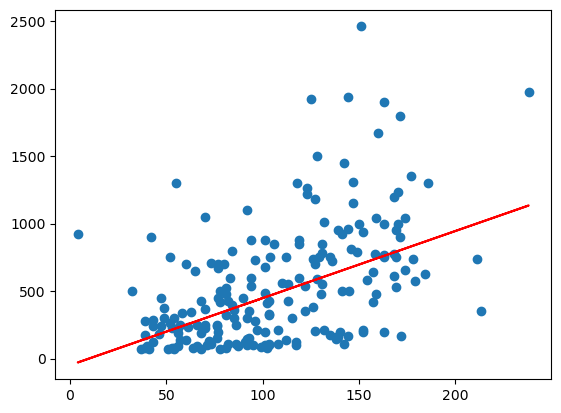

In [42]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r") # basit svr gösterim

In [43]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [44]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

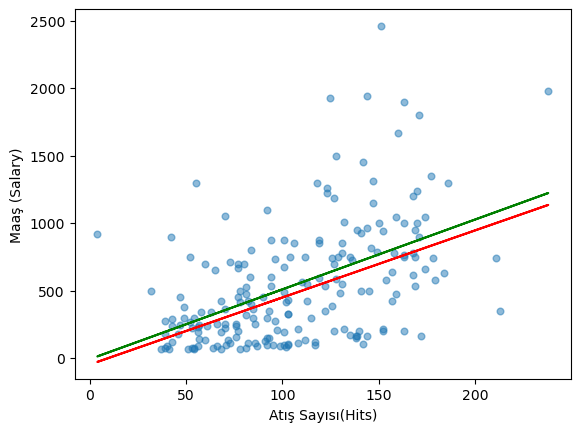

In [45]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

In [46]:
# svr tahmin

In [47]:
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [49]:
svr_model.predict([[91]])

array([403.52804878])

In [50]:
y_pred=svr_model.predict(X_test)

In [51]:
np.sqrt(mean_squared_error(y_test,y_pred))

459.0187960365147

In [52]:
svr_model

SVR(kernel='linear')

In [53]:
# model tuning

In [71]:
svr_model

SVR(kernel='linear')

In [ ]:
svr_params={"C":np.arange(0.1,2,0.1)}
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

In [ ]:
svr_cv_model.best_params_

In [ ]:
svr_tuned = SVR(kernel="linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [ ]:
y_pred=svr_tuned.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# DOĞRUSAL OLMAYAN SVR

In [77]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [79]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

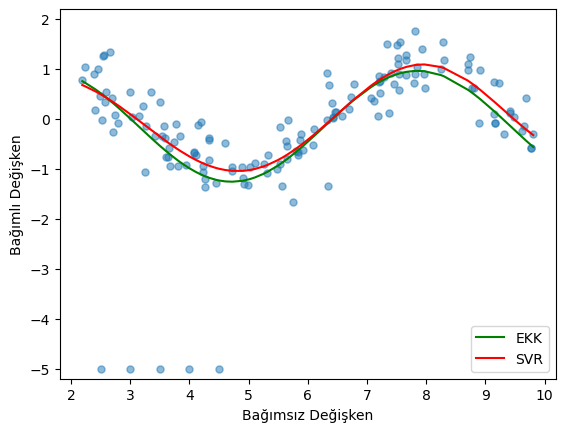

In [84]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4); # doğrusal olmayan svr grafiği

In [82]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [83]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)

In [85]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [86]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10) # svr rbf modelini optimum parametre değerlerini bul diyoz 10 ktlı Cv yapıyoruz
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [87]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [88]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [89]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

In [90]:
# yapay sinir ağları
# insan beyninin bilgi işleme şeklini referans alan sınıflandrıma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalrından birisidir

In [91]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [94]:
X_train_scaled = scaler.transform(X_train) # dönüşüm işlemi standartlasşma işlemi

In [95]:
X_test_scaled = scaler.transform(X_test) # dönüşüm işlemi

In [96]:
from sklearn.neural_network import MLPRegressor

In [97]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [98]:
mlp_model # model kuruldu yukarıda

MLPRegressor(hidden_layer_sizes=(100, 20))

In [99]:
mlp_model.n_layers_ # katman sayısı

4

In [100]:
mlp_model.hidden_layer_sizes # gizli katman sayısı

(100, 20)

In [101]:
y_pred = mlp_model.predict(X_test_scaled)

In [102]:
np.sqrt(mean_squared_error(y_test, y_pred)) # tahmin ettik test hatasını aldık

527.4270090447499

In [103]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [111]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [112]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [113]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [114]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [115]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [119]:
y_pred = mlp_tuned.predict(X_test_scaled)
y_pred

array([ 486.40468799,  754.3207699 , 1045.00319184,  627.33793904,
        452.81290121,  288.12080935,  662.80801136,  485.72832679,
        969.63145298,  613.98348309,  698.84295425,  939.37625083,
        560.69544027,  777.10597412,  243.99520759,  653.43993704,
        993.83465246,  242.87977722, 1114.41652542,  228.82193818,
        317.1279548 ,  902.71989687,  498.59441337,  536.10216239,
        979.15754855,  234.11316606,  701.01080492,  225.15832288,
        524.67472374,  282.18658214,  239.7241889 ,  407.59130674,
        281.55026232,  366.93570282,  275.56944259,  538.97439586,
       1506.69377875,  173.10208375,  356.85644636,  296.09189894,
        232.98532427,  249.28033369,  399.49755574,  297.57213154,
       1021.62591721,  750.10766319,  464.42261069,  208.70206647,
        265.84687546,  720.53996987,  748.03552217,  370.9325062 ,
        592.3593907 ,  288.66714483,  289.53339704,  755.77536409,
        419.3449817 ,  660.73075251,  336.89254617, 1471.97740

In [118]:
np.sqrt(mean_squared_error(y_test, y_pred))

361.8380500684449

In [1]:
# KARAR AĞAÇLARI : cart : amaç veri seti içerisindeki karmaşık yapıları bait karar yapılarına
# dömüştürmektir ,heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt grublara ayrılır

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [4]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [11]:
cart_model=DecisionTreeRegressor(max_leaf_nodes=10)

In [12]:
cart_model

DecisionTreeRegressor(max_leaf_nodes=10)

In [13]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

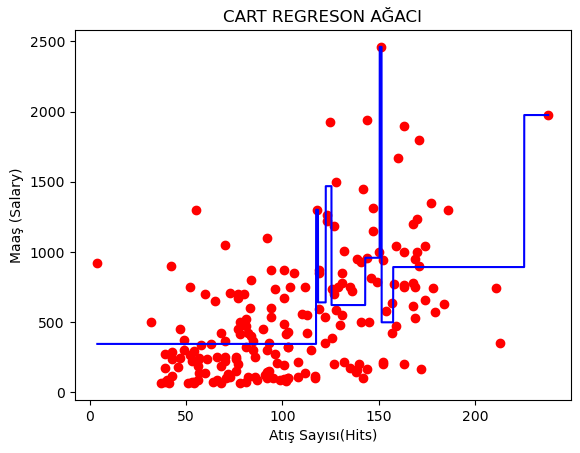

In [14]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [23]:
!pip install skompiler

     ---------------------------------------- 0.0/45.5 kB ? eta -:--:--
     ----------------- -------------------- 20.5/45.5 kB 330.3 kB/s eta 0:00:01
     ---------------------------------- --- 41.0/45.5 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 45.5/45.5 kB 375.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54349 sha256=35f7985b14464292d753a7014614ad0efc717221f14cc56b7b43bcca6af626b5
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\14\72\77\016a3480b154c1c2f70dcb355af1a01ef832974079ec6148e6
Successfully built skompiler


In [24]:
#!pip install scikit-learn scikit-learn-utils
from skompiler import skompile

In [25]:
print(skompile(cart_model.predict).to('python/code'))

ModuleNotFoundError: No module named 'astor'

In [26]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [32]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=7,min_samples_split=3)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))

482.6932542288411

In [37]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [38]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [39]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_leaf_nodes=7,
                                             min_samples_split=3),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [41]:
cart_cv_model.best_params_ # en iyi hiperparaemter saysınız belirliyoruz

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [46]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [47]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [48]:
y_pred = cart_tuned.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066

In [50]:
# bagged tree : temeli boostrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getilirek değerlendirmesine dayanır

In [51]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [52]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [53]:
bag_model.n_estimators

10

In [54]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=963023426),
 DecisionTreeRegressor(random_state=1159493536),
 DecisionTreeRegressor(random_state=1728295159),
 DecisionTreeRegressor(random_state=445590537),
 DecisionTreeRegressor(random_state=1331938953),
 DecisionTreeRegressor(random_state=1037293305),
 DecisionTreeRegressor(random_state=732109854),
 DecisionTreeRegressor(random_state=2030793123),
 DecisionTreeRegressor(random_state=97540264),
 DecisionTreeRegressor(random_state=1472788857)]

In [57]:
bag_model.estimators_samples_ # her bir ağaçtaki örnek sayıısı


[array([ 30, 128, 188,  98, 114, 145,  33,  79, 125,  20,  97,  89,  35,
        123, 136, 160, 176, 167,  37,  64,  15,  74,  78,  71,  51,  90,
         10, 173, 105, 180,  52,  38, 131, 167,  49, 118,  48, 119, 163,
        173, 166,  23,  91,  15, 107, 105, 172,  29, 103,  72,  47, 184,
         54, 152, 139, 134,  25,  41,  72,  91, 188,  48,  94, 159,  66,
        180,  51, 174, 165,  33, 184,  61,  37,  22, 186,  69, 168,  65,
        107,  84, 129,  46,   8, 190,  26, 112,  55,  75, 154, 140, 126,
        180, 161,  75, 140,  33,  73,  57,  32, 107, 175,  66,   7, 123,
        158, 149, 180, 181, 140, 132,  80,  71, 110,  37, 122, 121,  50,
        150, 134,  28, 174,  71, 134, 122, 177, 166,   6,  70,  98, 178,
        180,  59,  71, 185, 175, 170, 188, 166,  25,   0, 168,   6,  10,
         64,  65, 134,  70,  43,  21, 112, 142, 128, 170,  97, 100, 196,
        164,  53,  73, 156,  93,  78,  72,  74, 121,  59,  69, 107,  42,
          8,  83, 181, 149,  12, 130, 159, 186,  33

In [58]:
bag_model.estimators_features_ # her bir ağaçtaki bağımsız değişkne sayısı

[array([ 2, 14, 13, 13,  2,  5, 11,  1, 14, 15,  9,  5, 17,  3,  8,  2,  5,
        11,  8]),
 array([ 0, 14, 17,  3,  6,  7,  8,  2, 17,  9,  8,  8, 11, 18,  1, 18, 18,
        17, 15]),
 array([18, 17,  9, 16,  4, 11,  0, 17,  3, 15,  0, 18, 17, 14,  4, 10,  9,
         7, 18]),
 array([ 9,  7,  1,  6, 11,  7, 12,  5,  8,  9, 14, 18,  2,  7, 13, 15, 12,
        17,  8]),
 array([ 9,  7,  8, 13,  4,  5, 15,  3,  0,  0,  2, 12,  1,  0,  2, 17,  5,
        17,  3]),
 array([13,  6,  3,  8, 13,  5, 10, 17,  9,  0,  1,  9, 10, 11,  4,  4,  6,
        11, 14]),
 array([17,  1,  6, 15,  1,  8,  6, 12,  8,  4,  8, 17, 14,  4,  4,  8,  0,
         5, 11]),
 array([ 3,  4, 14, 10, 18, 17, 13, 14,  5, 10, 11,  5,  8,  4, 16,  5, 14,
        16,  0]),
 array([ 8, 15,  9,  0,  1, 17, 18,  9,  7,  3, 18, 12,  6, 13, 15, 12, 16,
        16, 11]),
 array([ 4, 11,  3,  0,  5,  1, 10,  1,  0, 10, 17,  1,  1, 17,  5, 16,  3,
         5,  7])]

In [60]:
bag_model.estimators_[2]

DecisionTreeRegressor(random_state=1728295159)

In [61]:
y_pred = bag_model.predict(X_test)

In [62]:
np.sqrt(mean_squared_error(y_test, y_pred)) 

334.1332237002857

In [63]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)


In [67]:
np.sqrt(mean_squared_error(y_test, iki_y_pred)) # ağaçların tek tek eriştiğimiz sonuçları

450.8783820496858

In [68]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

In [70]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))# ağaçların tek tek eriştiğimiz sonuçları

563.7214503192023

In [71]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [72]:
bag_params = {"n_estimators": range(2,20)}

In [73]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [74]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [75]:
bag_cv_model.best_params_ # tahminci sayısı

{'n_estimators': 8}

In [76]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state = 45)

In [77]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=14, random_state=45)

In [78]:
y_pred = bag_tuned.predict(X_test) # burda tahmin et diyoruz predict ile

In [79]:
np.sqrt(mean_squared_error(y_test, y_pred))

346.457987188104

In [80]:
# random forest : temeli birden cok karak ağacının üretiği tahminlerin bir araya getirikerek değerlendirilmesine dayanıır

In [81]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rf_model = RandomForestRegressor(random_state = 42)

In [84]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [85]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [86]:
y_pred = rf_model.predict(X_test)

In [87]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

In [88]:
rf_params = {'max_depth': list(range(1,10)), # RANDOM FOREST İK ÖNEMLİ ŞEY VAR : FİT EDİLECEK AĞAÇ SAYISI,BÖLÜNMEDE KULLANILAN DEĞİŞKEN SAYISI
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [89]:
rf_model = RandomForestRegressor(random_state = 42)

In [90]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1) # parelel olan işlemleri aynı anda yapar zaman hızlanır

In [91]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [92]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [93]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200) # AĞAÇ SAYISI TAHMİN ÜRETEN İYİ ÇALIŞTIRAN DEĞER, 500 VE 1000 DEĞER EN İİYİ AĞAÇ SAYISIDIR

In [94]:
rf_tuned.fit(X_train, y_train);

In [95]:
y_pred = rf_tuned.predict(X_test)

In [96]:
np.sqrt(mean_squared_error(y_test, y_pred))

347.3286695743194

In [97]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

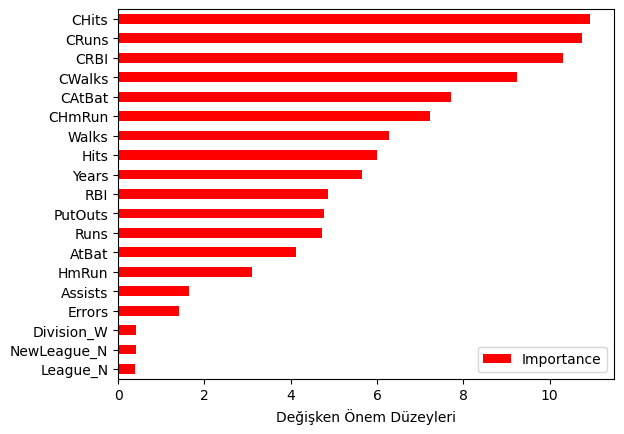

In [98]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [99]:
# graident boosting machines : zayıf , artıklardan güçlü model oluşturma fikrine dayanır

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train) # gbm ler hem linear de kullanılır hemde ağaçlarda kulllanılır

GradientBoostingRegressor()

In [104]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

353.6253952827831

In [105]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [ ]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [ ]:
gbm_cv_model.best_params_

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
#xGBoost : gmlerin hız ve tahmin performasnını arttırmak üzere optimize edilmiş ,ölçeklenbilir ve farklı platformlara entegre edilebilir halidir
!pip install xgboost # kaggle de kullanılır , TAHMİN başarısı yüksektir
import xgboost as xgb

In [ ]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor().fit(X_train, y_train)


In [ ]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
xgb_model

In [ ]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [ ]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

In [ ]:
xgb_cv.best_params_

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# LİGHT GBM : şuan trendde bu var xgbmnin daha iyiysi gibi


In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
conda install -c conda-forge lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [ ]:
lgbm_model

In [ ]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))